In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator

In [3]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")

column_to_remove = list(training_data.select_dtypes(include=['category','object'])) 
training_data = training_data.drop(column_to_remove, axis=1)
training_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [4]:
training_data.loc[training_data['LotFrontage'].isna() , 'LotFrontage'] = 0
training_data.loc[training_data['GarageYrBlt'].isna() , 'GarageYrBlt'] = 0
training_data.loc[training_data['MasVnrArea'].isna() , 'MasVnrArea'] = 0

training_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [5]:
columns_has_null = training_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

Series([], dtype: int64)

# Testing training data on the training dataset with a 0.75 to 0.25 ratio training data - testing data

In [6]:
X = training_data.iloc[:, :-1]
y = training_data.iloc[:, -1:]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, train_size=0.75)

In [8]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

C:\Users\ianpe\AppData\Local\Temp\ipykernel_4452\3799881120.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [9]:
print("model score on training data:", forest.score(X_train, y_train))

model score on training data: 0.9746114614158132


In [10]:
print("model score on test data:", forest.score(X_test, y_test))

model score on test data: 0.8930809428408597


# Matrix

<AxesSubplot:>

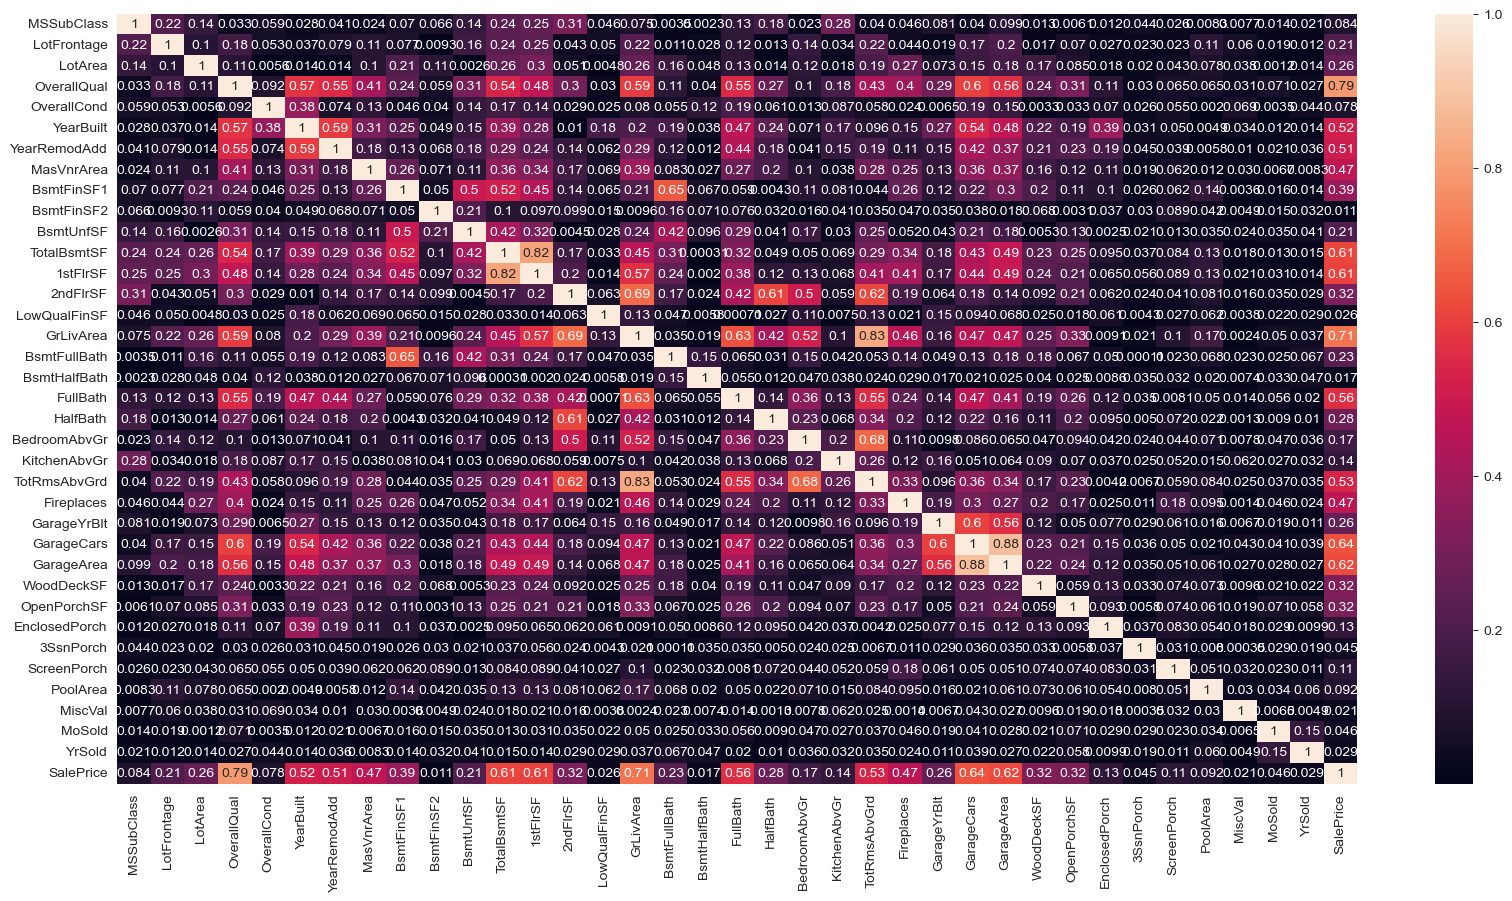

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(training_data.corr().abs(),  annot=True)

In [19]:
matrix = training_data.corr().abs()
columns_to_keep = matrix.iloc[-1, :]>=0.15
rows_to_keep = matrix.iloc[:, -1]>=0.15
new_matrix = matrix.loc[rows_to_keep, columns_to_keep]
new_matrix

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.100739,0.176561,0.036853,0.078686,0.105010,0.076670,0.160829,0.238274,0.245181,...,0.012952,0.144494,0.221396,0.044018,0.019317,0.165229,0.201473,0.016780,0.069605,0.209624
LotArea,0.100739,1.000000,0.105806,0.014228,0.013788,0.103321,0.214103,0.002618,0.260833,0.299475,...,0.014259,0.119690,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,0.263843
OverallQual,0.176561,0.105806,1.000000,0.572323,0.550684,0.407252,0.239666,0.308159,0.537808,0.476224,...,0.273458,0.101676,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,0.790982
YearBuilt,0.036853,0.014228,0.572323,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,...,0.242656,0.070651,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.078686,0.013788,0.550684,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,...,0.183331,0.040581,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,0.507101
MasVnrArea,0.105010,0.103321,0.407252,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,...,0.199108,0.102775,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,0.472614
BsmtFinSF1,0.076670,0.214103,0.239666,0.249503,0.128451,0.261256,1.000000,0.495251,0.522396,0.445863,...,0.004262,0.107355,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,0.160829,0.002618,0.308159,0.149040,0.181133,0.113862,0.495251,1.000000,0.415360,0.317987,...,0.041118,0.166643,0.250647,0.051575,0.042720,0.214175,0.183303,0.005316,0.129005,0.214479
TotalBsmtSF,0.238274,0.260833,0.537808,0.391452,0.291066,0.360067,0.522396,0.415360,1.000000,0.819530,...,0.048804,0.050450,0.285573,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,0.613581
1stFlrSF,0.245181,0.299475,0.476224,0.281986,0.240379,0.339850,0.445863,0.317987,0.819530,1.000000,...,0.119916,0.127401,0.409516,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,0.605852


<AxesSubplot:>

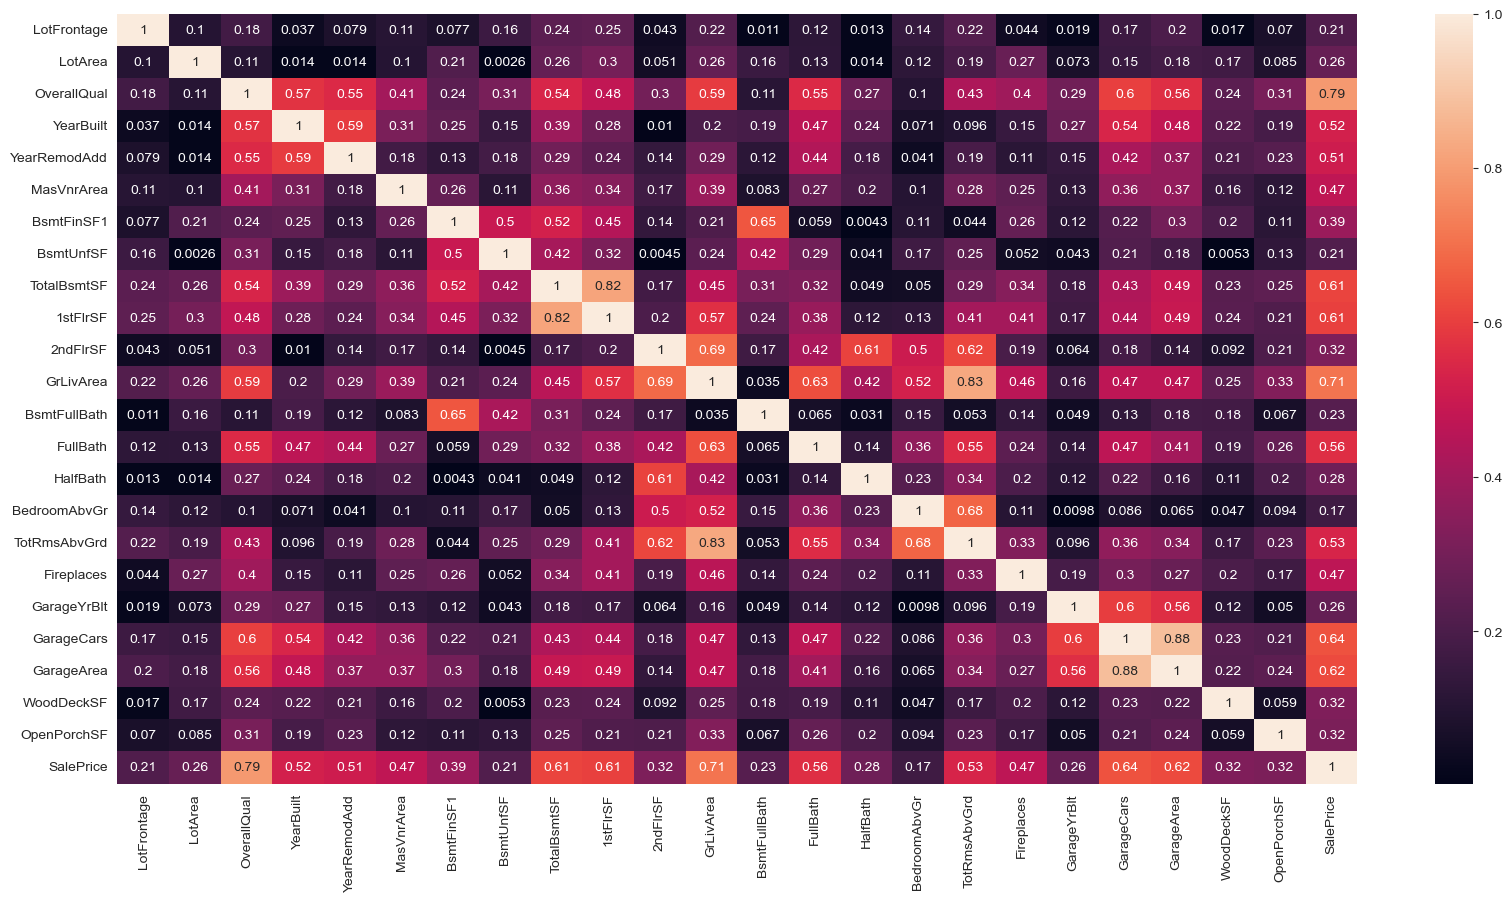

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(new_matrix,  annot=True)